**************************

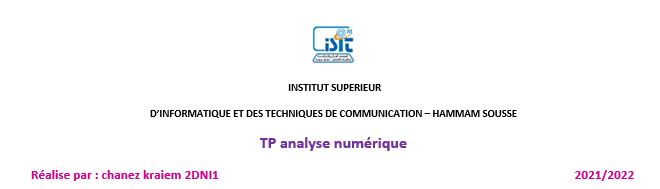

*************************

## <center style="color:#c90076" > PROJET ANALYSE NUMERIQUE</center>
####  <center style="color:#a64d79" >Intégration Numérique</center>
***

## <p style="color:#674ea7">Partie Théorique</p>
***

> <p >L'intégration est un des problèmes les plus importants que l'on rencontre en analyse. En effet, on rencontre souvent des intégrales dont le calcul par des méthodes analytiques est trés compliqué ou meme impossible, car il n'existe pas d'expression analytique d'une primitive de la fonction à intégrer.
    
>Dans ces cas, on peut appliquer des méthodes composites pour evaluer la valeur de l'integrale
donnée.</p>

>On appelle formule composite l’expression caractérisant cette estimation.
Notons k l’indice des n sous-intervalles, h = (b − a)/n la longueur de chacun d’eux, xk = a + kh la borne inférieure et
mk = a + (k + 1/2)h le point milieu, ceci pour k entre 0 et n − 1. Voici quelques formules composites :

####  <p style="color:#741b47"> Méthode des réctangles :</p>

<img src="image1.PNG"/>

####  <p style="color:#741b47"> Méthode du point milieu :</p>

<img src="image2.PNG"/>

####  <p style="color:#741b47"> Méthode des trapèzes :</p>

<img src="image3.PNG"/>

####  <p style="color:#741b47"> Méthode de Simpson :</p>

<img src="image4.PNG"/>

*************************

## <p style="color:#674ea7">Partie Pratique</p>
***

soit les 4 fonctions suivantes :
<img src="image5.PNG"/>

Le but de ceTP est de comparer ces 4 méthode d’intégrations numériques.


In [25]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from ipywidgets import *

In [26]:
f=lambda x:1/(1+x**2)

In [27]:
f=lambda x:sin(x)

In [28]:
f=lambda x:cos(x)

In [29]:
f=lambda x:x**2-x+5


# <font color=#8e7cc3> Méthode des rectangles à gauche : </font>

>La plupart des méthodes d'intégration numérique fonctionnent sur le même principe. On commence par couper le gros intervalle [a,b] en N plus petits intervalles [ai,ai+1], avec a1=a et aN+1=b. Puis, pour chaque intervalle [ai,ai+1], on essaie d'approcher . Les moyens les plus simples sont :
la méthode des rectangles à gauche : on approche  par . Géométriquement, cela signifie qu'on approche l'intégrale de f par l'aire des rectangles hachurés en vert :

<img src="image6.PNG"/>

In [30]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des rectangles gauches' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.9f}'.format(self.n,self.integrate( f ) ) , fontsize =15)

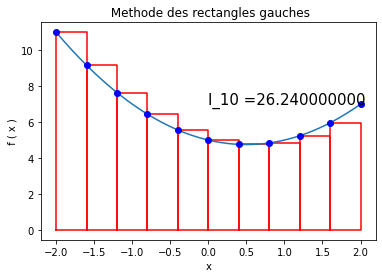

In [31]:
def simulation(n,f):
    Re=RectangleG(-2,2,n,f)
    return Re.Graph(f) 
simulation(10,f)

In [32]:
interact (simulation, n=widgets.IntSlider(
    min=1, max=50, step=5,value=10), f={'1/(1+x**2)': lambda x:1/(1+x**2), 
                                        'sin(x)': lambda x:sin(x),'cos(x)': lambda x:cos(x),'x**2-x+5': lambda x:x**2-x+5})

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=5), Dropdown(description='f', o…

<function __main__.simulation(n, f)>

# <font color=#8e7cc3> Méthode du point milieu : </font>

>la méthode du point milieu : on approche  par <img src="image7.PNG"/>.
Géométriquement, cela signifie qu'on approche l'intégrale de f par l'aire des rectangles hachurés en bleu :

<img src="image8.PNG"/>.


In [33]:
class PointMilieu ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
        
     
        
    def integrate ( self , f ) :
        h = float(self.b-self.a)/(self.n)
        sum1 = 0
        for i in range(self.n):
            sum1 += f(self.a + (i+1/2)*h)
                      
        I = h*sum1
        return I
    
    def Graph ( self , f , resolution=1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            mi=(xl[i]+xl[i+1])/2
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , f(mi) , f(mi) , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
            plt.plot(mi,f(mi),'r*')
        yflist_fine=f(xlist_fine)
        plt.plot (xlist_fine,yflist_fine )
        plt.xlabel ( 'x' )
        plt.ylabel ( 'f(x)' )
        plt.title ( ' Methode des points milieux' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.9f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

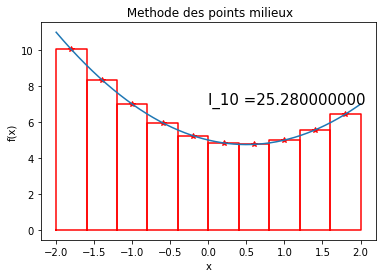

In [34]:
def simulationM(n,f):
    M=PointMilieu(-2,2,n,f)
    return M.Graph(f)   
simulationM(10,f)


In [35]:

interact (simulationM, n=widgets.IntSlider(
min=1, max=50, step=5,value=10), f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)': np.vectorize(lambda x:sin(x)),'cos(x)': np.vectorize(lambda x:cos(x)),'x**2-x+5': lambda x:x**2-x+5})   

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=5), Dropdown(description='f', o…

<function __main__.simulationM(n, f)>

# <font color=#8e7cc3> simulation de ces deux méthodes : </font>

In [36]:
def sim(n,f):
    Re=RectangleG(-1,1,n,f)
    M=PointMilieu(-1,1,n,f)
    fig= plt.figure(figsize=(12,4))
    plt.subplot(121)
    Re.Graph(f)  
    plt.subplot(122)    
    M.Graph(f)
    plt.show()

In [37]:
interact(sim,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':np.vectorize(lambda x:sin(x)),'cos(x)': np.vectorize(lambda x:cos(x)),'x**2-x+5': lambda x:x**2-x+5})

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

<function __main__.sim(n, f)>

# <font color=#8e7cc3> Méthode des trapèzes : </font>

>La méthode d'intégration approchée, dite des trapèzes, décrite ci-après, introduite par Newton & Cotes est plus précise que la méthode élémentaire, dite des rectangles, correspondant aux sommes de Cauchy-Riemann, consistant à remplacer la fonction initiale par une approximation en escalier. Graphiquement, sur l'intervalle [xi, xi+1], on remplace l'arc de courbe par le segment [MiNi+1], donc l'aire sous la courbe, par le « rectangle » xi Mi Ni+1 xi+1 (figure de gauche) :
<img src="image9.JPG"/>.

>La méthode des trapèzes, étudiée ici, remplace tout arc de courbe correspondant à [xi,xi+1] par le segment [MiMi+1], donc l'aire sous la courbe, par « trapèze » xi Mi Mi+1 xi+1 au lieu du « rectangle » xi Mi Ni+1 xi+1 (figure de droite ci-dessus).


In [38]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des Trapèzes' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

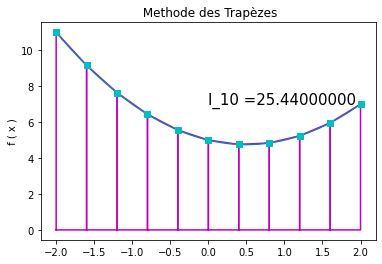

In [39]:
def simulationT(n,f):
    T=Trapezoidal(-2,2,n,f)
    return T.Graph(f)  
simulationT(10,f)

In [40]:

interact (simulationT, n=widgets.IntSlider(
min=1, max=50, step=5,value=10), f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)': np.vectorize(lambda x:sin(x)),'cos(x)': np.vectorize(lambda x:cos(x)),'x**2-x+5': lambda x:x**2-x+5})   

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=5), Dropdown(description='f', o…

<function __main__.simulationT(n, f)>


# <font color=#8e7cc3> Visualisation de ces 3 méthodes : </font>

In [41]:
def simf(n,f):
    Re=RectangleG(-1,1,n,f)
    M=PointMilieu(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f)
    fig= plt.figure(figsize=(17,4))
    plt.subplot(131)
    Re.Graph(f)  
    plt.subplot(132)
    M.Graph(f)
    plt.subplot(133)    
    T.Graph(f)
    plt.show()

In [42]:
interact(simf,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':np.vectorize(lambda x:sin(x)),'cos(x)': np.vectorize(lambda x:cos(x)),'x**2-x+5': lambda x:x**2-x+5})

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

<function __main__.simf(n, f)>

# <font color=#8e7cc3> Méthode de Simpson : </font>

>La méthode de Simpson consiste à grouper trois points consécutifs de la courbe Mi, Mi+1 et Mi+2 et de remplacer l'arc de courbe passant par ces trois points par un arc de parabole. Notons que si les points Mi, Mi+1 et Mi+2 sont alignés, le calcul des paramètres de la parabole d'équation y = mx2 + px + q, passant par ces points conduira à m = 0. Par suite, quitte à parler de parabole dégénérée, ce cas n'est pas singulier.

<img src="image10.PNG"/>.

In [43]:
class Simpson ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n   
    def integrate ( self , f ) :
        x = self.x
        y=f(x)
        h=float(x[1]-x[0])
        n=len(x)-1
        if n%2==1:
            n-=1
        s = y[0] + y[n] + 4.0 * sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        return h*s/3.0
    def Graph ( self , f , resolution=1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            xx=np.linspace(xl[i],xl[i+1],resolution)
            m=(xl[i]+xl[i+1])/2
            aa=xl[i]
            bb=xl[i+1]
            l0=(xx-m)/(aa-m)*(xx-bb)/(aa-bb)
            l1=(xx-aa)/(m-aa)*(xx-bb)/(m-bb)
            l2=(xx-aa)/(bb-aa)*(xx-m)/(bb-m)
            P=f(aa)*l0+f(m)*l1+f(bb)*l2
            plt.plot(xx,P,'b')
            plt.plot(m,f(m),"r*")
    
        yflist_fine=f(xlist_fine)
        plt.plot (xlist_fine,yflist_fine,'g' )
        plt.plot (xl,yl,'bo' )
        plt.ylabel ( 'f(x)' )
        plt.title ( ' Méthode de Simpson' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

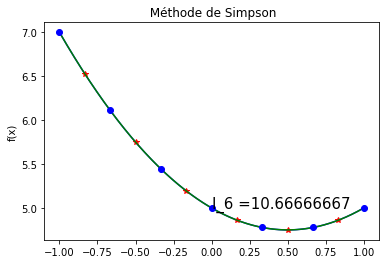

In [44]:
def simulationS(n,f):
    S=Simpson(-1,1,n,f)
    return S.Graph(f) 
simulationS(6,f)

## <font color=#8e7cc3>visualisation de 4 méthpdes</font>

In [45]:
def sim4(n,f):
    Re=RectangleG(-2,2,n,f)
    M=PointMilieu(-2,2,n,f)
    T=Trapezoidal(-1,1,n,f)
    S=Simpson(-2,2,n,f)
    fig= plt.figure(figsize=(15,8))
    plt.subplot(221)
    Re.Graph(f)  
    plt.subplot(222)
    M.Graph(f)
    plt.subplot(223)    
    T.Graph(f)
    plt.subplot(224)    
    S.Graph(f)
    plt.show()

In [46]:
interact(sim4,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':np.vectorize(lambda x:sin(x)),'cos(x)': np.vectorize(lambda x:cos(x)),'x**2-x+5': lambda x:x**2-x+5})

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

<function __main__.sim4(n, f)>

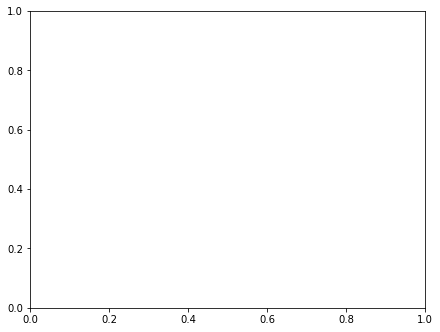

In [47]:
text_func = widgets.Text(value='cos(x)', description='Fonction', continuous_update=False)
text_xlabel = widgets.Text(value='', description='xlabel', continuous_update=False)
text_ylabel = widgets.Text(value='', description='ylabel', continuous_update=False)
text_a = widgets.Text(value='-1', description='borne a', continuous_update=False)
text_b = widgets.Text(value='1', description='borne b', continuous_update=False)
text_n= widgets.Text(value='3', description='n', continuous_update=False)
text_int=widgets.Text(value='', description='I_n', continuous_update=False)
text_int1=widgets.Text(value='', description='I_n', continuous_update=False)
text_int2=widgets.Text(value='', description='I_n', continuous_update=False)
text_int3=widgets.Text(value='', description='I_n', continuous_update=False)

button=widgets.Button(description='simulation')
button.style.button_color = 'lightgreen'
# callback functions
def simulate(b):
    dic={1:Simpson,2:Trapezoidal,3:PointMilieu,4:RectangleG}
    plt.clf()
    func=lambda x:eval(text_func.value)
    R=dic[1](float(text_a.value),float(text_b.value),int(text_n.value),func)
    T=dic[2](float(text_a.value),float(text_b.value),int(text_n.value),func)
    P=dic[3](float(text_a.value),float(text_b.value),int(text_n.value),func)
    S=dic[4](float(text_a.value),float(text_b.value),int(text_n.value),func)
    plt.subplots_adjust(hspace=0.4,wspace = 0.4)
    plt.subplot(221)
    R.Graph(func)
    plt.subplot(222)
    T.Graph(func)
    plt.subplot(223)
    S.Graph(func)
    plt.subplot(224)
    P.Graph(func)
    text_int.value=str(R.integrate(func))
    text_int.description='mRect.I'+text_n.value
    text_int1.value=str(T.integrate(func))
    text_int1.description='mTrap.I'+text_n.value
    text_int2.value=str(P.integrate(func))
    text_int2.description='mMilieu.I'+text_n.value
    text_int3.value=str(S.integrate(func))
    text_int3.description='mSimp.I'+text_n.value
    
def update_a(change):
    change.new
def update_b(change):
    change.new
def update_n(change):
    change.new
def update_f(change):
    change.new
    
button.on_click(simulate)
text_func.observe(update_f,'value')
text_a.observe(update_a,'value')
text_b.observe(update_b,'value')
text_n.observe(update_n,'value')
output = widgets.Output()
with output:
    fig,ax = plt.subplots(constrained_layout=True, figsize=(6,4.5))
# move the toolbar to the bottom
fig.canvas.toolbar_position = 'bottom'
def make_boxes():
    vbox1 = widgets.VBox([text_func,text_a,text_b,text_n,button,text_int,text_int1,text_int2,text_int3])
    vbox2=widgets.VBox([output])
    return vbox1,vbox2
box_layout=widgets.Layout(
    border='solid 3px green' ,
    margin='0px 10px 10px 0px',
    padding='5px 5px 5px 5px')
vbox1,vbox2=make_boxes()
vbox1.layout = box_layout
vbox2.layout = box_layout
widgets.HBox([vbox1, vbox2])

# <font color=#674ea7>Conclusion : </font>

>Plus que le nombre de subdivisions augmente, les valeurs sont plus proches des valeurs exactes. 